# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Ardi Widiyanto]
- **Email:** [ardiwidiyanto12@gmail.com]
- **ID Dicoding:** [Widraaa]

## Menentukan Pertanyaan Bisnis

- Apa konsentrasi polutan tertinggi yang ada pada stasiun dingling selama tahun 2013- 2017 ?
- Bagaimana tren konsentrasi CO yang terjadi pada stasiun dingling selama tahun 2013- 2017 ?
- Apakah terdapat pola harian  dalam konsentrasi polutan tiap bulannya selama tahun 2013 - 2017 pada stasiun dingling ?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  google.colab import files

## Data Wrangling

### Gathering Data

In [ ]:
uploaded_files=files.upload()

Saving PRSA_Data_Dingling_20130301-20170228.csv to PRSA_Data_Dingling_20130301-20170228.csv


In [ ]:
dingling_df = pd.read_csv("PRSA_Data_Dingling_20130301-20170228.csv")
dingling_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


**Insight:**
- Field data terdiri informasi Tahun Bulan Tanggal Hari Jam  beserta berbagai informasi terkait detail kualitas udara yang terdiri dari nilai PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd dan WSPM yang telah terjadi pada stasiun Dingling


### Assessing Data

In [ ]:
dingling_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
print("Jumlah duplikasi: ", dingling_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
dingling_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


In [ ]:
dingling_df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [ ]:
dingling_df.wd.value_counts()

,count
wd,
NNW,4776
NW,3838
N,3777
WNW,2877
ESE,2786
E,2427
NNE,1919
SSE,1853
SE,1823


In [ ]:
dingling_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,779
PM10,656
SO2,730
NO2,1234
CO,2012


**Insight:**
- Terdapat berbagai macam missing value yang ada pada dataset kualitas udara stasiun dingling yang terdiri dari field PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd dan WSPM
-  Permasalahan duplicate data dan invalid value pada   dataset stasiun dingling tidak ditemukan serta data type untuk tiap tiap field telah sama serta sesuai
- Penerapan method value_counts serta describe merupakan cara untuk mengidentifikasi nilai dominan serta rata rata/mean dari suatu field yang diperuntukan untuk mempermudah proses tahapan cleaning data


### Cleaning Data

In [ ]:
dingling_df['PM10'].fillna(value=83.73,inplace=True)
dingling_df['PM2.5'].fillna(value=65.98,inplace=True)
dingling_df.SO2.fillna(value=11.74,inplace=True)
dingling_df.NO2.fillna(value=27.58,inplace=True)
dingling_df.CO.fillna(value=904.89,inplace=True)
dingling_df.O3.fillna(value=68.54,inplace=True)
dingling_df.TEMP.fillna(value=13.68,inplace=True)
dingling_df.PRES.fillna(value=1007.76,inplace=True)
dingling_df.DEWP.fillna(value=1.50,inplace=True)
dingling_df.RAIN.fillna(value=0.60,inplace=True)
dingling_df.WSPM.fillna(value=1.85,inplace=True)


<ipython-input-20-d9d1c2afd51d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dingling_df['PM10'].fillna(value=83.73,inplace=True)
<ipython-input-20-d9d1c2afd51d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
dingling_df.wd.fillna(value="NNW",inplace=True)

In [ ]:
dingling_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


**Insight:**
- Pada penanganan missing value di tiap data maka dilakukan penerapan metode imputation untuk menangani missing value dan memperbaiki missing value yang ada dengan menggunakan nilai yang dominan atau menggunakan nilai modus pada field dengan tipe data kategorikal dan menggunakan nilai rata rata  untuk  field dengan tipe data numerik


## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
dingling_df.groupby('year')[['PM2.5','PM10','SO2','NO2','CO','O3']].mean().reset_index()

,year,PM2.5,PM10,SO2,NO2,CO,O3
0,2013,64.777277,78.762831,14.031960,29.890044,852.776426,65.187646
1,2014,73.949336,90.357876,14.458642,27.362105,877.656245,72.515142
2,2015,64.627411,85.350029,11.351025,26.881735,966.453289,70.952886
3,2016,60.041881,80.514372,7.294702,25.485913,874.441138,67.356598
4,2017,68.350155,78.650826,13.250438,34.387910,1151.824244,53.948842


In [ ]:
dingling_df.groupby('year')['CO'].mean().reset_index()

,year,CO
0,2013,852.776426
1,2014,877.656245
2,2015,966.453289
3,2016,874.441138
4,2017,1151.824244


In [ ]:
dingling_df.groupby("day").mean(numeric_only=True).reset_index()

,day,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,1,17198.500000,2014.666667,6.500000,11.5,74.287674,91.842708,11.967512,28.701918,1086.864349,67.602325,13.523524,1007.048785,1.688889,0.088194,1.840451
1,2,17222.500000,2014.666667,6.500000,11.5,59.307396,74.046215,13.860453,28.304989,915.075807,67.425141,13.762800,1006.294462,1.002691,0.034896,1.886719
2,3,17246.500000,2014.666667,6.500000,11.5,68.424792,85.348872,12.961410,29.119875,1003.909688,69.165723,14.168316,1006.392101,0.523438,0.015451,1.959288
3,4,17270.500000,2014.666667,6.500000,11.5,67.767917,81.568533,11.744785,29.021899,1004.321719,70.415212,13.758559,1006.834392,1.467535,0.114670,1.914670
4,5,17294.500000,2014.666667,6.500000,11.5,63.471146,83.715937,10.506674,23.820788,894.089566,74.323339,13.975926,1007.984896,1.338889,0.059983,1.985764
5,6,17318.500000,2014.666667,6.500000,11.5,72.193021,87.391337,12.946580,27.811228,955.275347,69.606595,13.455326,1008.254818,1.277951,0.089670,1.722049
6,7,17342.500000,2014.666667,6.500000,11.5,68.722431,83.154922,11.432513,28.315938,980.903342,67.002641,13.528814,1008.154126,1.662760,0.090799,1.786849
7,8,17366.500000,2014.666667,6.500000,11.5,66.206632,80.188472,12.771844,26.240141,888.259818,69.785791,13.346250,1008.077743,0.495920,0.012847,2.050651
8,9,17390.500000,2014.666667,6.500000,11.5,59.741372,79.798932,11.122194,25.114202,788.913472,68.804010,12.744345,1008.445938,0.653733,0.028212,1.919358
9,10,17414.500000,2014.666667,6.500000,11.5,52.617708,73.979774,10.496330,23.356551,765.627760,65.421565,12.983823,1008.327486,0.189236,0.041146,1.982422


**Insight:**
- Data yang telah dilakukan pembersihan maka  dilakukan eksplorasi dengan menggunakan groupping
- Penggunaan Groupping ke dalam tahun untuk tiap field polutan serta polutan co lalu mencari nilai mean atau rata rata merupakan cara untuk mengetahui bagaimana konsentrasi polutan tertinggi serta bentuk tren co yang terjadi pada stasiun dingling sepanjang 2013 sampai dengan 2017
- Penggunaan groupping tiap data numerical atau data polutan ke tiap tiap harinya lalu mencari nilai mean nya merupakann cara untuk mengetahui apakah terdapat pola harian dalam konsentrasi polutan yang terjadi setiap bulannya

## Visualization & Explanatory Analysis

### Pertanyaan 1:

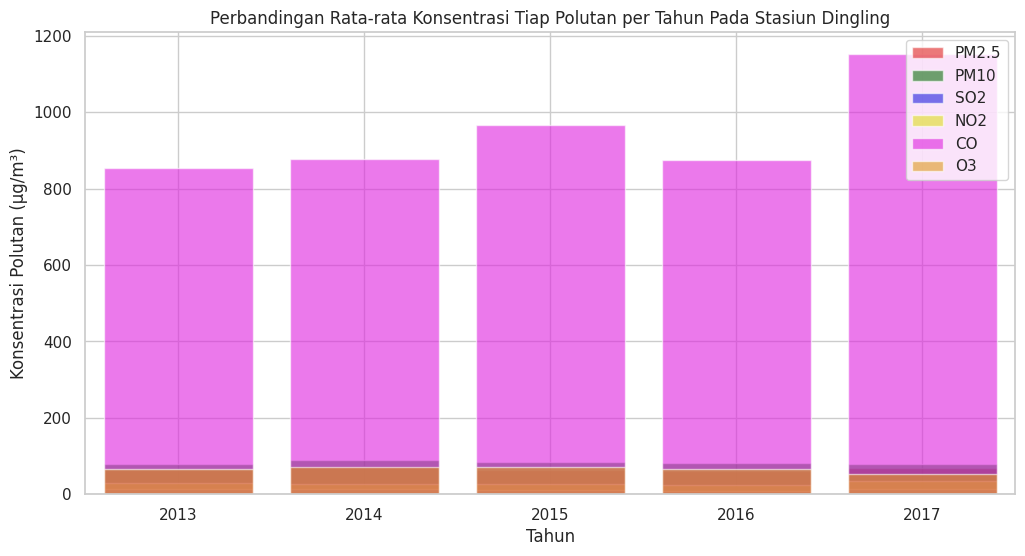

In [ ]:
dingling_df['date'] = pd.to_datetime(dingling_df[['year', 'month', 'day']])
dingling_df['year'] = dingling_df['date'].dt.year
Polutan_dataByYears = dingling_df.groupby('year')[['PM2.5','PM10','SO2','NO2','CO','O3']].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='PM2.5', data=Polutan_dataByYears, color='red', label='PM2.5', alpha=0.6)
sns.barplot(x='year', y='PM10', data=Polutan_dataByYears, color='green', label='PM10', alpha=0.6)
sns.barplot(x='year', y='SO2', data=Polutan_dataByYears, color='blue', label='SO2', alpha=0.6)
sns.barplot(x='year', y='NO2', data=Polutan_dataByYears, color='yellow', label='NO2', alpha=0.6)
sns.barplot(x='year', y='CO', data=Polutan_dataByYears, color='magenta', label='CO', alpha=0.6)
sns.barplot(x='year', y='O3', data=Polutan_dataByYears, color='orange', label='O3', alpha=0.6)
plt.title('Perbandingan Rata-rata Konsentrasi Tiap Polutan per Tahun Pada Stasiun Dingling')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2:

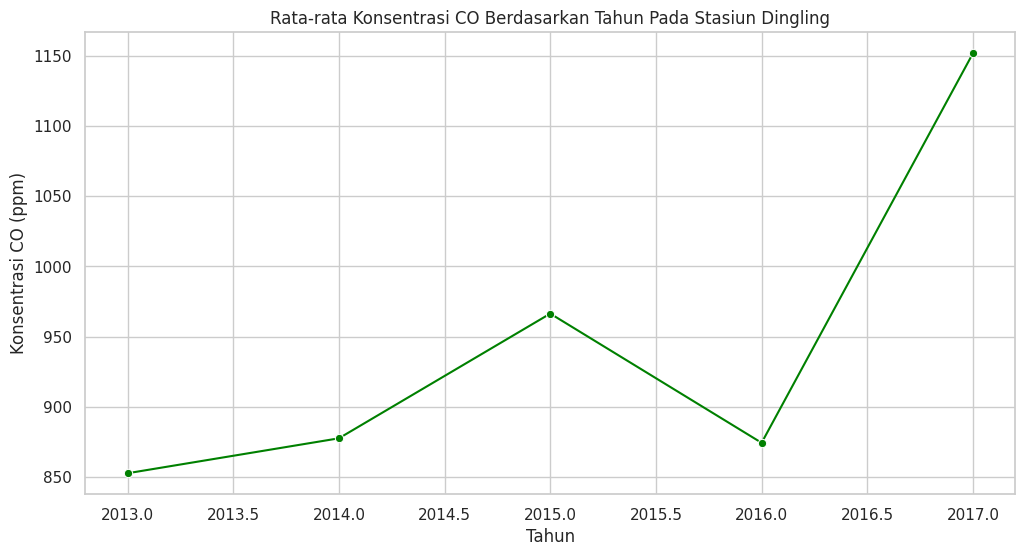

In [ ]:
dingling_df['date'] = pd.to_datetime(dingling_df[['year', 'month', 'day']])
dingling_df['year'] = dingling_df['date'].dt.year
COByYears = dingling_df.groupby('year')['CO'].mean().reset_index()
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='CO', data=COByYears, marker='o', color='green')
plt.title('Rata-rata Konsentrasi CO Berdasarkan Tahun Pada Stasiun Dingling')
plt.xlabel('Tahun')
plt.ylabel('Konsentrasi CO (ppm)')
plt.grid(True)
plt.show()

### Pertanyaan 3:

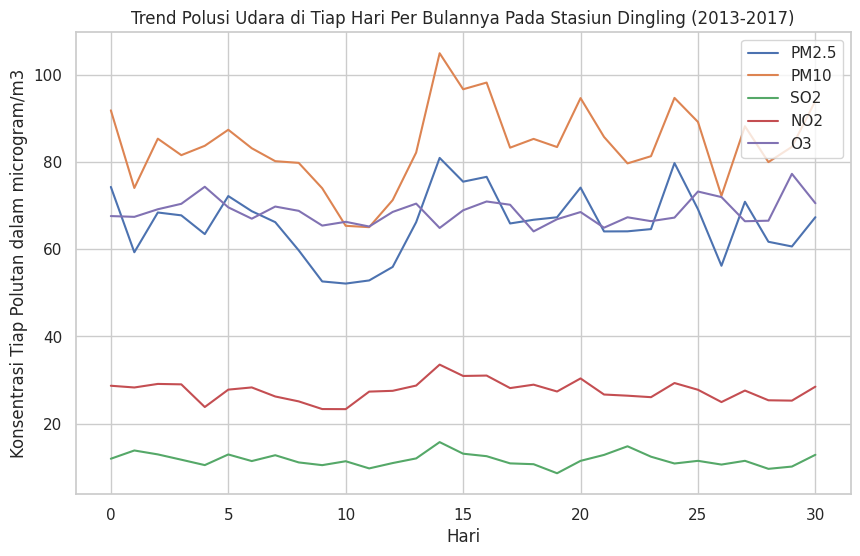

In [ ]:
DayGrouping = dingling_df.groupby("day").mean(numeric_only=True).reset_index()
plt.figure(figsize=(10,6))
plt.plot(DayGrouping.index, DayGrouping["PM2.5"], label="PM2.5")
plt.plot(DayGrouping.index, DayGrouping["PM10"], label="PM10")
plt.plot(DayGrouping.index, DayGrouping["SO2"], label="SO2")
plt.plot(DayGrouping.index, DayGrouping["NO2"], label="NO2")
plt.plot(DayGrouping.index, DayGrouping["O3"], label="O3")
plt.xlabel("Hari")
plt.ylabel("Konsentrasi Tiap Polutan dalam microgram/m3")
plt.title("Trend Polusi Udara di Tiap Hari Per Bulannya Pada Stasiun Dingling (2013-2017)")
plt.legend()
plt.show()

**Insight:**

- Konsentrasi PM2.5 dan PM10 secara konsisten lebih tinggi dibandingkan dengan polutan lain selama periode 2013-2017 di stasiun Dingling. Hal ini menunjukkan bahwa partikel halus dan kasar adalah sumber utama polusi udara di area tersebut. Kemungkinan besar berasal dari aktivitas kendaraan bermotor, industri, atau pembakaran domestik.

- Konsentrasi karbon monoksida (CO) menunjukkan fluktuasi tahunan, tetapi berada pada rentang yang relatif stabil tanpa lonjakan signifikan. Ini mengindikasikan bahwa polusi CO di stasiun Dingling mungkin lebih terkendali dibandingkan polutan lainnya. Namun, fluktuasi kecil dapat dipengaruhi oleh aktivitas kendaraan bermotor atau pembakaran bahan bakar fosil.

- Terdapat pola harian yang konsisten untuk konsentrasi polutan seperti PM2.5, PM10, SO2, NO2, dan O3 di setiap bulannya. PM2.5 dan PM10 cenderung lebih dominan dan menunjukkan pola fluktuasi yang signifikan, terutama di awal dan akhir bulan. Ini dapat dikaitkan dengan aktivitas manusia yang meningkat pada waktu tertentu, seperti pembakaran atau transportasi.

## Conclusion

- Kesimpulan pertanyaan pertama ialah Konsentrasi Polutan Tertinggi yang ada pada stasiun Dingling sepanjang tahun 2013-2017 merupakan polutan CO atau Carbon Monoxide
- Kesimpulan pertanyaan kedua ialah Tren Konsentrasi CO Pada stasiun dingling mengalami peningkatan sepanjang tahun 2013 - 2017 terutama pada tahun 2016 hingga 2017 dimana terjadi peningkatan yang signifikan
- Kesimpulan pertanyaan ketiga ialah konsentrasi polutan di tiap hari per bulannya memiliki pola  untuk beberapa jenis polutan seperti PM2.5 PM10 SO2 dan NO2 yang dapat dilihat pada Hari ke 15
